In [48]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv("breast_cancer_data.csv")

In [50]:
data.shape

(569, 33)

In [51]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [52]:
NAs = pd.concat([data.isnull().sum()],axis = 1, keys = ['null values'])
NAs[NAs.sum(axis = 1) > 0]

,null values
Unnamed: 32,569


In [53]:
data.drop(["Unnamed: 32"],axis = 1,inplace = True)

In [54]:
data.drop(['id'],axis = 1, inplace = True)

In [55]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [56]:
y = data.pop('diagnosis')
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [69]:
y.replace(['M','B'],[1,0],inplace = True)
y.head(3)

0    1
1    1
2    1
Name: diagnosis, dtype: int64

In [70]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size = 0.25)

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_pred = rf.predict(x_test)

In [75]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.9397727272727272

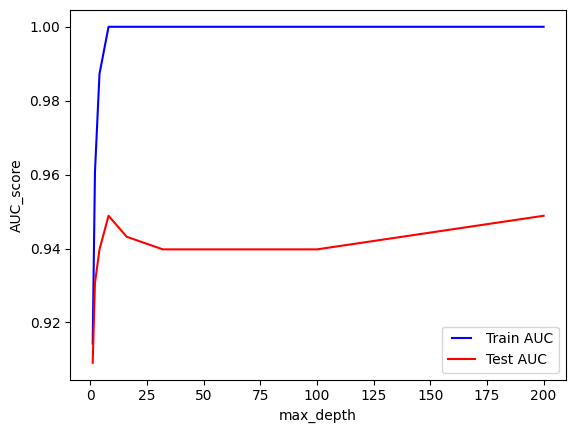

[0.9090909090909092, 0.930681818181818, 0.9397727272727272, 0.9488636363636364, 0.9431818181818182, 0.9397727272727272, 0.9397727272727272, 0.9397727272727272, 0.9488636363636364]
[0.914273198683494, 0.9607179220041199, 0.9872611464968153, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [79]:
max_depth = [1,2,4,8,16,32,64,100,200]
train_results = []
test_results = []

for max_dep in max_depth:
    rf = RandomForestClassifier(max_depth = max_dep, n_jobs = -1)
    rf.fit(x_train,y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label = "Train AUC")
line2, = plt.plot(max_depth, test_results, 'r', label = "Test AUC")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.xlabel('max_depth')
plt.ylabel('AUC_score')
plt.show()

print(test_results)
print(train_results)

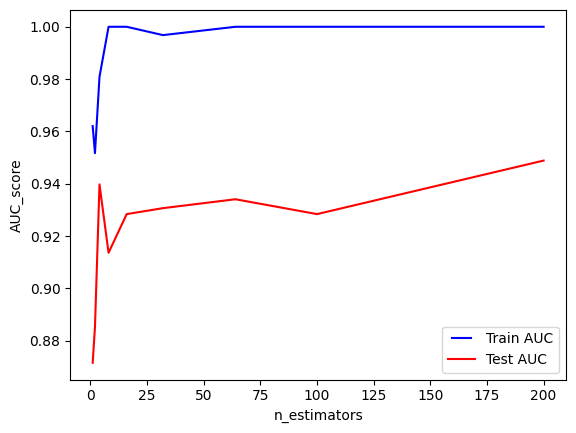

[0.8715909090909091, 0.8852272727272726, 0.9397727272727272, 0.9136363636363636, 0.9284090909090909, 0.930681818181818, 0.9340909090909091, 0.9284090909090909, 0.9488636363636364]
[0.9620438993204367, 0.9516965406198944, 0.9808917197452229, 1.0, 1.0, 0.9968152866242038, 1.0, 1.0, 1.0]


In [81]:
n_estimators = [1,2,4,8,16,32,64,100,200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, n_jobs = -1)
    rf.fit(x_train,y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label = "Train AUC")
line2, = plt.plot(max_depth, test_results, 'r', label = "Test AUC")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.xlabel('n_estimators')
plt.ylabel('AUC_score')
plt.show()

print(test_results)
print(train_results)